<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.tsa.ar_model import AR,ARResults

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/uspopulation.csv',index_col = 'DATE',parse_dates=True)

In [5]:
df.index.freq='MS'

In [6]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


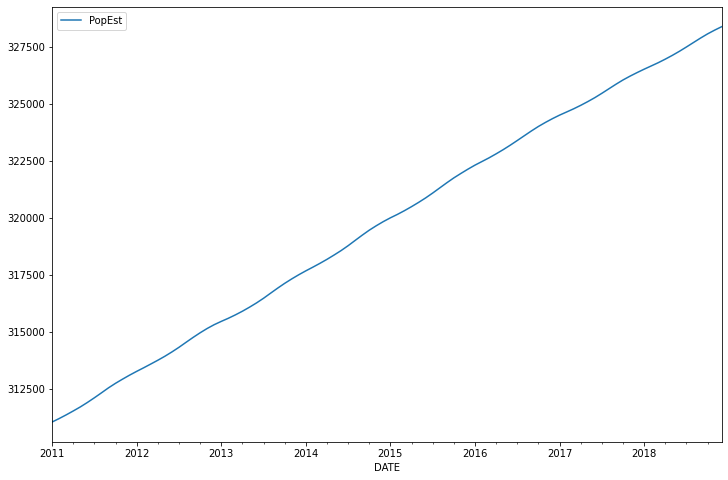

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df)

96

In [10]:
96-12

84

In [11]:
train = df.iloc[:84]
test = df.iloc[84:]

In [12]:
model = AR(train['PopEst'])

In [13]:
AR1fit = model.fit(maxlag=1,)

In [15]:
AR1fit.k_ar

1

In [16]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [17]:
start = len(train)

In [18]:
end = len(train) + len(test) -1

In [19]:
end

95

In [20]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [21]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [22]:
predictions1 = AR1fit.predict(start=start,end=end)

In [23]:
predictions1 = predictions1.rename('AR(1) Predictions')

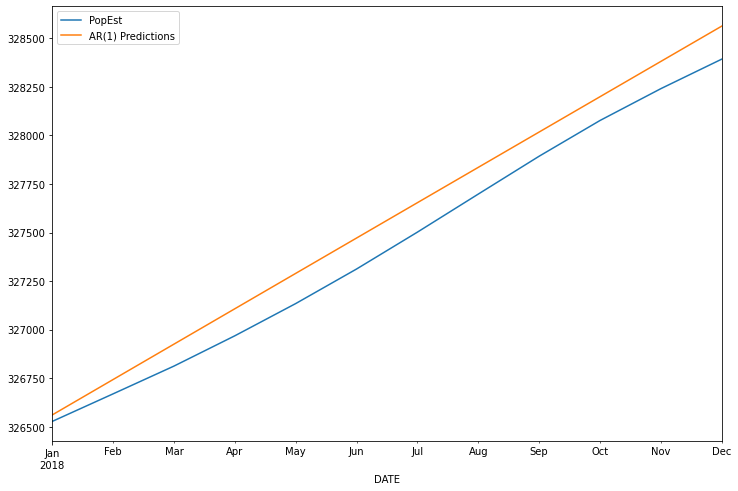

In [24]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(figsize=(12,8),legend=True)

In [25]:
AR2fit  = model.fit(maxlag=2)

In [26]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64